In [15]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import  Model, Sequential
from keras.applications.vgg16 import VGG16 # Uses Imagenet Dataset
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob # the glob module is used to retrieve files/pathnames matching a specified pattern. The pattern rules of glob follow standard Unix path expansion rules.
import matplotlib.pyplot as plt

In [16]:
# Reshape all the image as VGG16 was trained with image size of 254*254
IMAGE_SIZE = [254,254]

In [17]:
train_path = '/content/drive/MyDrive/Data_Science/CNN/VGG16/Face_Recognition/Datasets/Train'
test_path = '/content/drive/MyDrive/Data_Science/CNN/VGG16/Face_Recognition/Datasets/Test'

In [18]:
vgg = VGG16(input_shape= IMAGE_SIZE + [3], weights= 'imagenet', include_top= False)
# Adding 3 is adding 3 rd channel - RGB, we are using the wts used in Imagenet, Include false is we are neglecting the last output layer
# as the image net is trained with large amt of data and we are training for small amt of data we will add last layer manually

In [19]:
# we should not train the existing layers as it was already trained and fixed so we need to set as false it is important.

for layer in vgg.layers:
  layer.trainable = False

In [20]:
# glob is useful for getting no of classes

folders = glob('/content/drive/MyDrive/Data_Science/CNN/VGG16/Face_Recognition/Datasets/Train/*')
folders

['/content/drive/MyDrive/Data_Science/CNN/VGG16/Face_Recognition/Datasets/Train/Teresa',
 '/content/drive/MyDrive/Data_Science/CNN/VGG16/Face_Recognition/Datasets/Train/Kalam']

In [21]:
# add no of layers as per need we are going to flatten the layer

x = Flatten()(vgg.output)
pred = Dense(len(folders), activation= 'softmax')(x)

In [22]:
# Creating the model object

model = Model(inputs = vgg.input, outputs = pred)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0   

In [23]:
# Compile the model the model what is the cost fun and optimizer to use

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) # we should not set other parameters for test data

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_Science/CNN/VGG16/Face_Recognition/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_Science/CNN/VGG16/Face_Recognition/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 6 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1/1 [==============================] - 0s 273ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 231ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0402 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 229ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 228ms/step - loss: 7.4610e-04 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 223ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000


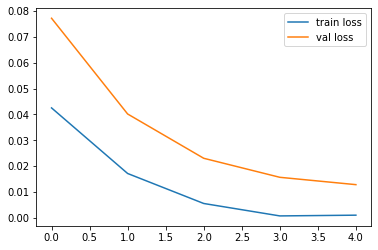

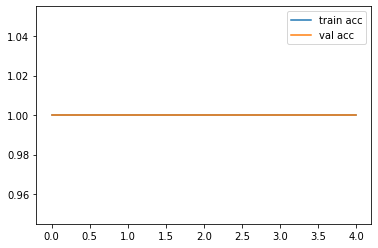

<Figure size 432x288 with 0 Axes>

In [30]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')